In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
%matplotlib inline
import sys
sys.path.append("..")
from utils import test_train_split, evaluate_model_torch, subtract_spont, corrcoef, PCA,zscore

In [4]:
U=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_U_ep_pytorch.npy')
V=np.load('/home/maria/Documents/EnsemblePursuit/SAND9/experiments/natimg2800_M170717_MP034_2017-09-11.mat_V_ep_pytorch.npy').T
data = io.loadmat('/home/maria/Documents/EnsemblePursuit/SAND9/data/natimg2800_M170717_MP034_2017-09-11.mat')
resp = data['stim'][0]['resp'][0]
spont =data['stim'][0]['spont'][0]
X=subtract_spont(spont,resp).T
print(X.shape)
print(V.shape)
print(U.shape)

/home/maria/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:138: RuntimeWarning: invalid value encountered in sqrt
  ret = um.sqrt(ret, out=ret)


(10103, 5880)
(150, 5880)
(10103, 150)


In [11]:
print(np.nonzero(U[:,0]))
print(np.corrcoef(V[0],X[9,:]))

(array([    2,     3,     9, ..., 10091, 10099, 10100]),)
[[1.         0.15014311]
 [0.15014311 1.        ]]


(804,)
804
[0.08055743492479717, 0.091873933563354, -0.053747623690760804, 0.18405197012575467, 0.1396711890019841, 0.04318964404989861, 0.1251025249412788, -0.28446517652600695, -0.22334572437792105, -0.03353378083602769, 0.19725106711707177, -0.15451031875747293, 0.12928866916140194, 0.07331723395316105, -0.3536267422931407, 0.12390831516060642, 0.17924923368064574, 0.03498460365835628, -0.024520807657432954, 0.2273204156885894, 0.17666103348305676, -0.029970366158210318, 0.040252089915017504, 0.010565785958829042, 0.19739620145251707, -0.0020500689834665217, 0.2147134031988907, 0.07165099746601133, 0.0014019054592599375, 0.055403774516098396, 0.09569775095789719, 0.06330739587375965, 0.15209632749626695, -0.17157736995908554, -0.008447779336115967, 0.17880141695934723, 0.23495261031554882, 0.17645655420405246, 0.1578766979176847, 0.0672308002147356, 0.06816730571006052, 0.05119066061132592, 0.09214313642552674, 0.11910034822821419, 0.049409253910224146, 0.26640512683054707, 0.033756

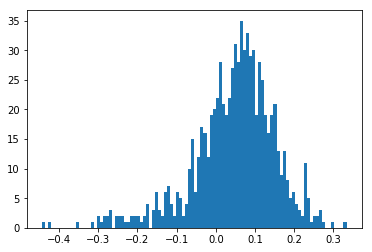

In [33]:
corr_lst=[]
ensemble_ind=5
ensemble_neurons=np.nonzero(U[:,ensemble_ind])[0]
for j in range(0,ensemble_neurons.shape[0]):
    #print(X[ensemble_neurons[ensemble_ind],:])
    #print(ensemble_neurons[j])
    corr_lst.append(np.corrcoef(V[1,:],X[ensemble_neurons[j],:])[0,1])
    
plt.hist(corr_lst,bins=100)
print(ensemble_neurons.shape)
print(len(corr_lst))
print(corr_lst)